<a href="https://colab.research.google.com/github/SRIDEV93/Predicting-Loan-Repayment/blob/main/Predicting_Loan_Repayment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the Data

Before we start cleaning data for a machine learning project, it is vital to understand what the data is, and what we want to achieve. Without that understanding, we have no basis from which to make decisions about what data is relevant as we clean and prepare our data.

We'll be working with some data from Lending Club, a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. Each borrower fills out a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower's credit score using past historical data (and their own data science processs!) and assigns an interest rate to the borrower.

Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower's credit score, the purpose for the loan, and other information from the application.

Once an investor decided to fund a loan, the borrower then makes monthly payments back to Lending Club. Lending Club redistributes these payments to investors. This means that investors don't have to wait until the full amount is paid off to start to see returns. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition to the requested amount.

Many loans aren't completely paid off on time, however, and some borrowers default on the loan. That's the problem we'll be trying to address as we clean some data from lending club for machine learning. Let's imagine we've been tasked with building a model to predict whether borrowers are likely to pay or default on their loans.

# Importing Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Dataset

The dataset of lending_club_loans.csv was downloaded, but we haven't load that into pandas DataFrame to explore it. Once it is loaded, we have to do some data cleaning to remove unncessary features which slows our data processing.





In [2]:
# skip row 1 so pandas can parse the data properly.
loans = pd.read_csv('lending_club_loans.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,17,37,49,53,55,60,82,110) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data Preprocessing

Initially the size of the dataset is large with more unncessary columns. So we have to remove them.

Removing all the columns with morethan 50% missing values: This allows us to work faster.


In [3]:
loans.shape

(42538, 115)

In [4]:
half_count = len(loans) / 2
half_count

21269.0

Remove the 'desc' column: It contains a long text explanation for the loan that we don't need.

Remove the 'url' column: It contains a link to each on Lending Club which can only be accessed with an investor account.

In [5]:
# Drop any columns which have more than 50% missing values

loans = loans.dropna(thresh=half_count,axis=1)
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12,Fully Paid,False,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01,735.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,False,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01,171.62,2016-09,744.0,740.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12,Charged Off,False,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,1999-04,740.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,False,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04,119.66,2016-09,499.0,0.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12,Fully Paid,False,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2001-11,735.0,739.0,2.0,2.0,0.0,2956.0,0.985,10.0,False,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06,649.91,2016-09,719.0,715.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12,Fully Paid,False,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0.0,1996-02,690.0,694.0,1.0,10.0,0.0,5598.0,0.210,37.0,False,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01,357.48,2016-04,604.0,600.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12,Current,False,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>",other,Personal,972xx,OR,17.94,0.0,1996-01,695.0,699.0,0.0,15.0,0.0,27783.0,0.539,38.0,False,270.78,270.78

In [6]:
loans.shape

(42538, 58)

In [7]:
loans = loans.drop(['url','desc'], axis=1)

In [8]:
loans.shape

(42538, 56)

In [9]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12,Fully Paid,False,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01,735.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,False,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01,171.62,2016-09,744.0,740.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12,Charged Off,False,car,bike,309xx,GA,1.00,0.0,1999-04,740.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,False,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04,119.66,2016-09,499.0,0.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12,Fully Paid,False,small_business,real estate business,606xx,IL,8.72,0.0,2001-11,735.0,739.0,2.0,2.0,0.0,2956.0,0.985,10.0,False,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06,649.91,2016-09,719.0,715.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12,Fully Paid,False,other,personel,917xx,CA,20.00,0.0,1996-02,690.0,694.0,1.0,10.0,0.0,5598.0,0.210,37.0,False,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01,357.48,2016-04,604.0,600.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12,Current,False,other,Personal,972xx,OR,17.94,0.0,1996-01,695.0,699.0,0.0,15.0,0.0,27783.0,0.539,38.0,False,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,2016-09,67.79,2016-09,694.0,690.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False


# Further Cleaning of columns

Now, It's time to understand each feature for better analysing of the data and to improve the model process.

Here, Iam tam taking data dictionary from LendingClub provides to help us become familiar with the columns and what each column represents in the dataset. To make the process easier, we'll create a DataFrame to contain the names of the columns, datatype, firt'st row values, and description from the data dictionary.





In [10]:
data_dictionary = pd.read_csv('LCDataDictionary.csv')

print(data_dictionary.shape[0])
print(data_dictionary.columns.tolist())

117
['LoanStatNew', 'Description']


In [11]:
data_dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [12]:
data_dictionary = data_dictionary.rename(columns={'LoanStatNew' : 'name','Description' : 'description'})

Now our data dictionary loaded, Let's join the first row of loans to the data_dictionary DataFrame to give us a preview DataFrame with the following columns.

* name - contains the column names of loans
* dtypes - contains the data types of the loans
* first value - contains the values of the loans first row.
* description - explains what each column in loans represents.


In [13]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12,Fully Paid,False,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01,735.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,False,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01,171.62,2016-09,744.0,740.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12,Charged Off,False,car,bike,309xx,GA,1.00,0.0,1999-04,740.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,False,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04,119.66,2016-09,499.0,0.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12,Fully Paid,False,small_business,real estate business,606xx,IL,8.72,0.0,2001-11,735.0,739.0,2.0,2.0,0.0,2956.0,0.985,10.0,False,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06,649.91,2016-09,719.0,715.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12,Fully Paid,False,other,personel,917xx,CA,20.00,0.0,1996-02,690.0,694.0,1.0,10.0,0.0,5598.0,0.210,37.0,False,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01,357.48,2016-04,604.0,600.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12,Current,False,other,Personal,972xx,OR,17.94,0.0,1996-01,695.0,699.0,0.0,15.0,0.0,27783.0,0.539,38.0,False,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,2016-09,67.79,2016-09,694.0,690.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False


In [14]:
loans_dtypes = pd.DataFrame(loans.dtypes, columns=['dtypes'])
loans_dtypes = loans_dtypes.reset_index()
loans_dtypes['name'] = loans_dtypes['index']
loans_dtypes = loans_dtypes[['name','dtypes']]
loans_dtypes['first value'] = loans.loc[0].values
preview = loans_dtypes.merge(data_dictionary, on='name', how='left')


In [15]:
preview.head()

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1296599.0,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000.0,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000.0,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for that loan at that point in time.


When we print the shape of loans earlier,we noticed that it has 56 columns, so we know that this preview DataFrame has 56 rows( one explaning each column in loans).

It can be cumbersome to try to explore all the rows of a preview at once, so instead we'll break it up into 3 parts and look at smaller selction of features each time. As we explore the features to better understand each of them, we'll want to pay attention to any column that

* leaks information from the future (after the loan has already been funded),

** Data leakage refers to a mistake that is made by  a machine learning model in which information about the target variable is leaking into the input of the model during the training of the model

* doesn't affect the borrowers's ability to pay back the loan(e.g a randomly generated ID value by Lending Club)

* is formatted poorly,

* requires more data or a lot of pre-processing to turn into useful a feature, or

* contains redudant information.

These are all things we'll want to be careful about, since handling them incorrectly will effect our analysis in the long run.


We need to especially pay close attention to data leakage, this will make our model to overfit. As the model is learning from the features that won't be available when we're using it make predictions about future loans. We need to be sure our model is trained using only the data it would have at the point of a loan application.

* First Group of Columns
Let's display the first 19 rows of preview and analyze them:




In [16]:
preview[:19]

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1296599.0,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000.0,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000.0,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,float64,0.1065,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


After Analyzing the columns and considering the model we're trying to build, we can conclude that the following features can be removed:

* id - randomly generated field by LendingClub for unique identification purposes only.
* member_id - also randomly generated field by LendingClub fo ridentifiaction purposes only.
* funded_amnt - leaks information from the future (after the loan is already started to be funded).
* funded_amnt_inv - also leaks data from the future.
* sub_grade - contains redundant information that is already in the grade column.
* int_rate - also included within the grade column.
* emp_title - requires other data and a lot of preprocessing to become potentially useful
* issued_d - leaks data from the future.

What may be useful for our model is to focus on clusters of borrowers instead of individuals. And, that's exactly what grading does - it segments borrowers based on their credit score and other behaviours, which is why we will keep the grade column and drop interest int_rate and sub_grade. Let's drop these columns from the DataFrame before moving onto to the next group of columns.

In [17]:
drop_list = ['id', 'member_id','funded_amnt','funded_amnt_inv','int_rate','sub_grade','emp_title','issue_d']
loans = loans.drop(drop_list, axis=1)

Now, we're ready to move on to the next group of features.

**Second Group of Columns**

Let's move on to the next 19 columns:

In [18]:
preview[19:38]

,name,dtypes,first value,description
19,title,object,Computer,The loan title provided by the borrower
20,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
21,addr_state,object,AZ,The state provided by the borrower in the loan application
22,dti,float64,27.65,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
23,delinq_2yrs,float64,0.0,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
24,earliest_cr_line,object,1985-01,The month the borrower's earliest reported credit line was opened
25,fico_range_low,float64,735.0,The lower boundary range the borrower’s FICO at loan origination belongs to.
26,fico_range_high,float64,739.0,The upper boundary range the borrower’s FICO at loan origination belongs to.
27,inq_last_6mths,float64,1.0,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
28,open_acc,float64,3.0,The number of open credit lines in the borrower's credit file.


In this group, take note of the fico_range_low and fico_range_high columns. While both are in the table above, we'll take more about them after lookingat the last group of columns. Also note that if you're working with newer Lending Club data, it may not include data on FICO scores.


For now, reviewing our second group of columns, we can further refine our data set by dropping the following columns:

* zip_code - most redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible.
* out_prncp - leaks data from the future.
* out_prncp_inv - also leaks data from the future.
* total_pymnt - also leaks data from the future.
* total_pymnt_inv - also leaks data from the future.

So let's drop these columns from the dataframe

In [19]:
drop_cols = ['zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv']
loans = loans.drop(drop_cols, axis=1)

**Third Group of Columns**

Let's analyze the last group of features


In [20]:
preview[38:]

,name,dtypes,first value,description
38,total_rec_prncp,float64,5000.0,Principal received to date
39,total_rec_int,float64,863.16,Interest received to date
40,total_rec_late_fee,float64,0.0,Late fees received to date
41,recoveries,float64,0.0,post charge off gross recovery
42,collection_recovery_fee,float64,0.0,post charge off collection fee
43,last_pymnt_d,object,2015-01,Last month payment was received
44,last_pymnt_amnt,float64,171.62,Last total payment amount received
45,last_credit_pull_d,object,2016-09,The most recent month LC pulled credit for this loan
46,last_fico_range_high,float64,744.0,The upper boundary range the borrower’s last FICO pulled belongs to.
47,last_fico_range_low,float64,740.0,The lower boundary range the borrower’s last FICO pulled belongs to.


In this last group od columns, we need to drop the following, all of which leak data from the future

* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_d
* last_pymnt_amount

Drop out last group of columns

In [21]:
drop_cols = ['total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']
loans = loans.drop(drop_cols, axis=1)

Great! We've now got a dataset that's going to be much more useful for building our model.

**Let's Understand FICO Scores Column**

It's worth taking a moment to discuss the fico_range_low, fico_range_high, last_fico_range_low and last_fico_range_high columns.

**FICO scores** are a credit score - a number used by banks and credit cards to represent how credit-worthy a person is. while there are a few types of credit scores used in US, the FICO score is the best known and most widely used.

When a borrower applies for a loan, LendingClub gets the borrower's credit score from FICO - they are given a lower and upper limit of the range that the borrowers score belongs to, and they store those values as fico_range_low, fico_range_high. After that, any updates to the borrowers score are recorded as last_fico_range_low, and last_fico_range_high.

While Looking at the trend of the FICO scores is a great prdictor of whether a loan will default, FICO scores continue to be updated by LendingClub after a loan is funded. In other words, while we can use the initial FICO scores (fico_range_low and fico_range_high)- those would be available as part of a borrower's application - we cannot use last_fico_range_low, and last_fico_range_high, as LendingClub may have updated these after the borrower's application.

Let's look at the values in the 2 columns we can use




In [22]:
print(loans['fico_range_low'].unique())
print(loans['fico_range_high'].unique())

[735. 740. 690. 695. 730. 660. 675. 725. 710. 705. 720. 665. 670. 760.
 685. 755. 680. 700. 790. 750. 715. 765. 745. 770. 780. 775. 795. 810.
 800. 815. 785. 805. 825. 820. 630. 625.  nan 650. 655. 645. 640. 635.
 610. 620. 615.]
[739. 744. 694. 699. 734. 664. 679. 729. 714. 709. 724. 669. 674. 764.
 689. 759. 684. 704. 794. 754. 719. 769. 749. 774. 784. 779. 799. 814.
 804. 819. 789. 809. 829. 824. 634. 629.  nan 654. 659. 649. 644. 639.
 614. 624. 619.]


Let’s get rid of the missing values, then plot histograms to look at the ranges of the two columns:

42538
42535


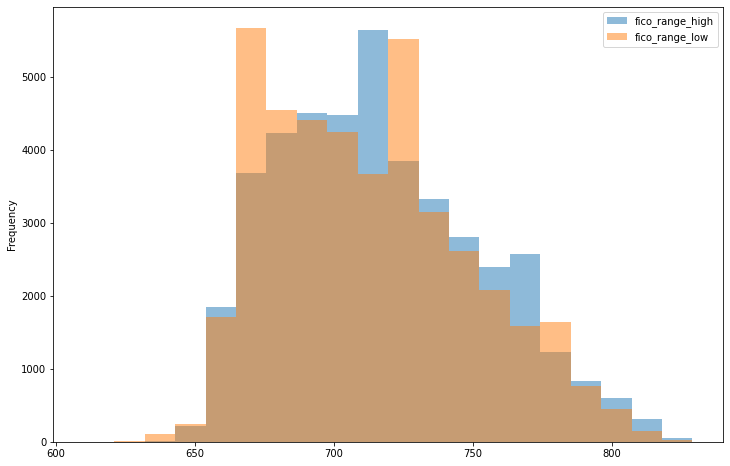

In [23]:
fico_columns = ['fico_range_high', 'fico_range_low']
print(loans.shape[0])

loans.dropna(subset=fico_columns,inplace=True)
print(loans.shape[0])

loans[fico_columns].plot.hist(alpha=0.5,bins=20);

Let's now go ahead and create a column for the average of fico_range_low and fico_range_high columns and name it fico-average. Note that this is not the average FICO score for each borrower, but rather an average of the high and low range that we knoe the borrowers is in.

In [24]:
loans['fico_average'] = (loans['fico_range_high'] + loans['fico_range_low']) / 2

In [25]:
cols = ['fico_range_low','fico_range_high','fico_average']
loans[cols].head()

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0


Good! We got the mean calculations and everything right. Now, we can go ahead and drop fico_range_low, fico_range_high, last_fico_range_low, and last_fico_range_high columns.

In [26]:
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high']
loans = loans.drop(drop_cols, axis=1)
loans.shape

(42535, 33)

Notice just by becoming familiar with the columns in the data set, we’ve been able to reduce the number of columns from 56 to 33 without losing any meaningful data for our model. We’ve also avoided problems by dropping data that leaks information from the future, which would have messed up our model’s results. This is why data cleaning is so important!

**Decide On A Target Column**

Now, we’ll decide on the appropriate column to use as a target column for modeling.

Our main goal is predict who will pay off a loan and who will default, we we need to find a column that reflects this. We learned from the description of columns in the preview DataFrame that loan_status is the only field in the main data set that describes a loan status, so let’s use this column as the target column.

In [27]:
preview[preview.name == 'loan_status']

,name,dtypes,first value,description
16,loan_status,object,Fully Paid,Current status of the loan


Currently, this column contains text values that need to be converted to numerical values to be able use for training a model. Let’s explore the different values in this column and come up with a strategy for converting them. We’ll use the DataFrame method value_counts() to return the frequency of the unique values in the loan_status column.

In [28]:
loans["loan_status"].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

The loan status has nine different possible values! Let’s learn about these unique values to determine the ones that best describe the final outcome of a loan, and also the kind of classification problem we’ll be dealing with.

We can read about most of the different loan statuses on the LendingClub website as well as these posts on the Lend Academy and Orchard forums.

Below, we’ll pull that data together in a table below so we can see the unique values, their frequency in the data set, and get a clearer idea of what each means:

In [29]:
meaning = [
"Loan has been fully paid off.",
"Loan for which there is no longer a reasonable expectation of further payments.",
"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"Loan is up to date on current payments.",
"The loan is past due but still in the grace period of 15 days.",
"Loan hasn't been paid in 31 to 120 days (late on the current payment).",
"Loan hasn't been paid in 16 to 30 days (late on the current payment).",
"Loan is defaulted on and no payment has been made for more than 121 days."]
status, count = loans["loan_status"].value_counts().index, loans["loan_status"].value_counts().values
loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation

,Loan Status,Count,Meaning
0,Fully Paid,33586,Loan has been fully paid off.
1,Charged Off,5653,Loan for which there is no longer a reasonable expectation of further payments.
2,Does not meet the credit policy. Status:Fully Paid,1988,"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
3,Does not meet the credit policy. Status:Charged Off,761,"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
4,Current,513,Loan is up to date on current payments.
5,In Grace Period,16,The loan is past due but still in the grace period of 15 days.
6,Late (31-120 days),12,Loan hasn't been paid in 31 to 120 days (late on the current payment).
7,Late (16-30 days),5,Loan hasn't been paid in 16 to 30 days (late on the current payment).
8,Default,1,Loan is defaulted on and no payment has been made for more than 121 days.


Remember, our goal is to build a machine learning model that can learn from past loans in trying to predict which loans will be paid off and which won’t. From the above table, only the Fully Paid and Charged Off values describe the final outcome of a loan. The other values describe loans that are still ongoing, and even though some loans are late on payments, we can’t jump the gun and classify them as Charged Off.

Also, while the Default status resembles the Charged Off status, in LendingClub’s eyes, loans that are charged off have essentially no chance of being repaid, while defaulted loans have a small chance. Therefore, we should use only samples where the loan_status column is 'Fully Paid' or 'Charged Off'.

We’re not interested in any statuses that indicate that the loan is ongoing or in progress, because predicting that something is in progress doesn’t tell us anything.

We’re interested in being able to predict which of 'Fully Paid' or 'Charged Off' a loan will fall under, so we can treat the problem as binary classification. Let’s remove all the loans that don’t contain either 'Fully Paid' or 'Charged Off' as the loan’s status and then transform the 'Fully Paid' values to 1 for the positive case and the 'Charged Off' values to 0 for the negative case.

This will mean that out of the ~42,000 rows we have, we’ll be removing just over 3,000.

There are few different ways to transform all of the values in a column, we’ll use the DataFrame method replace().

In [30]:
loans = loans[(loans["loan_status"] == "Fully Paid") |
(loans["loan_status"] == "Charged Off")]
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loans = loans.replace(mapping_dictionary)

#Visualizing the Target Column Outcomes

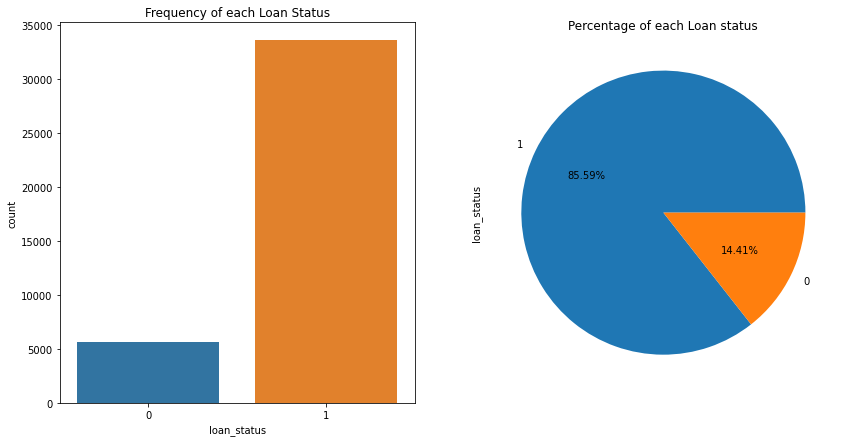

In [31]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

These plots indicate that a significant number of borrowers in our data set paid off their loan — 85.62% of loan borrowers paid off amount borrowed, while 14.38% unfortunately defaulted. It is these ‘defaulters’ that we’re more interested identifying, since for the purposes of our model we’re trying to find a way to maximize investment returns.

Not lending to these defaulters would help increase our returns, so we’ll continue cleaning our data with an eye towards building a model that can identify likely defaulters at the point of application.

Remove Columns with only One Value
To wrap up this section, let’s look for any columns that contain only one unique value and remove them. These columns won’t be useful for the model since they don’t add any information to each loan application. In addition, removing these columns will reduce the number of columns we’ll need to explore further in the next stage.

The pandas Series method nunique() returns the number of unique values, excluding any null values. We can use apply this method across the data set to remove these columns in one easy step.

In [32]:
loans = loans.loc[:,loans.apply(pd.Series.nunique) != 1]

Again, there may be some columns with more than one unique value, but one value that has insignificant frequency in the data set. Let’s find and drop any columns with unique values that appear fewer than four times:

In [33]:
for col in loans.columns:
    if (len(loans[col].unique()) < 4):
      print(loans[col].value_counts())
    print()


 36 months    29096
 60 months    10143
Name: term, dtype: int64






Not Verified       16845
Verified           12526
Source Verified     9868
Name: verification_status, dtype: int64

1    33586
0     5653
Name: loan_status, dtype: int64

False    39238
True         1
Name: pymnt_plan, dtype: int64


















The payment plan column (pymnt_plan) has two unique values, 'y' and 'n', with 'y' occurring only once. Let’s drop this column:

In [34]:
print(loans.shape[1])
loans = loans.drop('pymnt_plan', axis=1)
print("We've been able to reduce the features to => {}".format(loans.shape[1]))

25
We've been able to reduce the features to => 24


Lastly, let’s use pandas to save our freshly-cleaned DataFrame as a CSV file:

In [35]:
loans.to_csv("filtered_loans.csv",index=False)

Now we’ve got a much better data set to work with. But we’re still not done with our data cleaning work, so let’s keep at it!

# Preparing the Features for Machine Learning


In this section, we’ll prepare the filtered_loans_2007.csv data for machine learning. We’ll focus on handling missing values, converting categorical columns to numeric columns and removing any other extraneous columns.

We need to handle missing values and categorical features before feeding the data into a machine learning algorithm, because the mathematics underlying most machine learning models assumes that the data is numerical and contains no missing values. To reinforce this requirement, scikit-learn will return an error if you try to train a model using data that contain missing values or non-numeric values when working with models like linear regression and logistic regression.

Here’s an outline of what we’ll be doing in this stage:

- Handle Missing Values
- Investigate Categorical Columns
- Convert Categorical Columns To Numeric Features
  - Map Ordinal Values To Integers
  - Encode Nominal Values As Dummy Variables
  
First though, let’s load in the data from last section’s final output:

In [36]:
filtered_loans = pd.read_csv('filtered_loans.csv')
print(filtered_loans.shape)
filtered_loans.head()

(39239, 24)


,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,Computer,AZ,27.65,0.0,1985-01,1.0,3.0,0.0,13648.0,0.837,9.0,2016-09,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,bike,GA,1.00,0.0,1999-04,5.0,3.0,0.0,1687.0,0.094,4.0,2016-09,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,real estate business,IL,8.72,0.0,2001-11,2.0,2.0,0.0,2956.0,0.985,10.0,2016-09,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,personel,CA,20.00,0.0,1996-02,1.0,10.0,0.0,5598.0,0.210,37.0,2016-04,0.0,692.0
4,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,2004-11,3.0,9.0,0.0,7963.0,0.283,12.0,2016-01,0.0,732.0


# Handling Missing Values
Let’s compute the number of missing values and determine how to handle them. We can return the number of missing values across the DataFrame like this:

- First, use the Pandas DataFrame method isnull() to return a DataFrame containing Boolean values:
  - True if the original value is null
  - False if the original value isn’t null
- Then, use the Pandas DataFrame method sum() to calculate the number of null values in each column.

In [37]:
null_counts = filtered_loans.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                  0
term                       0
installment                0
grade                      0
emp_length              1057
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
fico_average               0
dtype: int64


Notice while most of the columns have 0 missing values, title has 9 missing values, revol_util has 48, and pub_rec_bankruptcies contains 675 rows with missing values.

Let’s remove columns entirely where more than 1% (392) of the rows for that column contain a null value. In addition, we’ll remove the remaining rows containing null values. This means we’ll lose a bit of data, but in return keep some extra features to use for prediction (since we won’t have to drop those columns).

We’ll keep the title and revol_util columns, just removing rows containing missing values, but drop the pub_rec_bankruptcies column entirely since more than 1% of the rows have a missing value for this column.

Specifically, here’s what we’re going to do:

* Use the drop method to remove the pub_rec_bankruptcies column from filtered_loans.

* Use the dropna method to remove all rows from filtered_loans containing any missing values.
And here’s how that looks in code.

In [38]:
filtered_loans = filtered_loans.drop("pub_rec_bankruptcies",axis=1)
filtered_loans = filtered_loans.dropna()

Note that there are a variety of ways to deal with missing values, and this is one of the most important steps in data cleaning for machine learning. Our Data Cleaning Advanced course for Python goes into a lot more depth on handling missing values when cleaning data and would be a great source for deeper learning on this topic.

For our purposes here, though, we’re all set with this step, so let’s move on to working with the categorical columns.

#Investigate Categorical Columns

Our goal here is to end up with a data set that’s ready for machine learning, meaning that it contains no missing values and that all values in columns are numeric (float or int data type).

We dealt with the missing values already, so let’s now find out the number of columns that are of the object data type and figure out how we can make those values numeric.

In [39]:
print("Data types and their frequency\n{}".format(filtered_loans.dtypes.value_counts()))

Data types and their frequency
float64    12
object     10
int64       1
dtype: int64


We have 11 object columns that contain text which need to be converted into numeric features. Let’s select just the object columns using the DataFrame method select_dtype, then display a sample row to get a better sense of how the values in each column are formatted.

In [40]:
object_columns_df = filtered_loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line           1985-01
last_credit_pull_d         2016-09
Name: 0, dtype: object


Notice that revol_util column contains numeric values, but is formatted as object. We learned from the description of columns in the preview DataFrame earlier that revol_util is a “revolving line utilization rate or the amount of credit the borrower is using relative to all available credit” (read more here). We need to format revol_util as a numeric value. Here’s what we can do:

* Use the str.rstrip() string method to strip the right trailing percent sign (%).
* On the resulting Series object, use the astype() method to convert to the type float.
* Assign the new Series of float values back to the revol_util column in the filtered_loans.

In [41]:
filtered_loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,Computer,AZ,27.65,0.0,1985-01,1.0,3.0,0.0,13648.0,0.837,9.0,2016-09,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,bike,GA,1.00,0.0,1999-04,5.0,3.0,0.0,1687.0,0.094,4.0,2016-09,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,real estate business,IL,8.72,0.0,2001-11,2.0,2.0,0.0,2956.0,0.985,10.0,2016-09,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,personel,CA,20.00,0.0,1996-02,1.0,10.0,0.0,5598.0,0.210,37.0,2016-04,692.0
4,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,2004-11,3.0,9.0,0.0,7963.0,0.283,12.0,2016-01,732.0


In [42]:
filtered_loans['revol_util'] = filtered_loans['revol_util'].astype(float)

Moving on, these columns seem to represent categorical values:

* home_ownership — home ownership status, can only be 1 of 4 categorical values according to the data dictionary.
* verification_status — indicates if income was verified by LendingClub.
* emp_length — number of years the borrower was employed upon time of application.
* term — number of payments on the loan, either 36 or 60.
* addr_state — borrower’s state of residence.
* grade — LC assigned loan grade based on credit score.
purpose — a category provided by the borrower for the loan request.
* title — loan title provided the borrower.
To be sure, lets confirm by checking the number of unique values in each of them.

Also, based on the first row’s values for purpose and title, it appears these two columns reflect the same information. We’ll explore their unique value counts separately to confirm if this is true.

Lastly, notice the first row’s values for both earliest_cr_line and last_credit_pull_d columns contain date values that would require a good amount of feature engineering for them to be potentially useful:

* earliest_cr_line — The month the borrower’s earliest reported credit line was opened.
* last_credit_pull_d — The most recent month LendingClub pulled credit for this loan.
For some analyses, doing this feature engineering might well be worth it, but for the purposes of this tutorial we’ll just remove these date columns from the DataFrame.

First, let’s explore the unique value counts of the six columns that seem like they contain categorical values:

In [43]:
cols = ['home_ownership', 'grade','verification_status', 'emp_length', 'term', 'addr_state']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

home_ownership :
RENT        18271
MORTGAGE    16945
OWN          2808
OTHER          96
NONE            3
Name: home_ownership, dtype: int64 

grade :
B    11545
A     9675
C     7801
D     5086
E     2715
F      993
G      308
Name: grade, dtype: int64 

verification_status :
Not Verified       16391
Verified           12070
Source Verified     9662
Name: verification_status, dtype: int64 

emp_length :
10+ years    8715
< 1 year     4542
2 years      4344
3 years      4050
4 years      3385
5 years      3243
1 year       3207
6 years      2198
7 years      1738
8 years      1457
9 years      1244
Name: emp_length, dtype: int64 

term :
 36 months    28234
 60 months     9889
Name: term, dtype: int64 

addr_state :
CA    6833
NY    3657
FL    2741
TX    2639
NJ    1802
IL    1476
PA    1460
VA    1359
GA    1340
MA    1292
OH    1167
MD    1020
AZ     819
WA     796
CO     755
NC     747
CT     719
MI     684
MO     653
MN     586
NV     473
SC     461
WI     433
OR     427
AL     42

Most of these columns contain discrete categorical values which we can encode as dummy variables and keep. The addr_state column, however, contains too many unique values, so it’s better to drop this.

Next, let’s look at the unique value counts for the purpose and title columns to understand which columns we want to keep.

In [44]:
for name in ['purpose','title']:
  print("Unique Values in column: {}\n".format(name))
  print(filtered_loans[name].value_counts(),'\n')

Unique Values in column: purpose

debt_consolidation    17965
credit_card            4944
other                  3764
home_improvement       2852
major_purchase         2105
small_business         1749
car                    1483
wedding                 927
medical                 663
moving                  556
house                   359
vacation                349
educational             312
renewable_energy         95
Name: purpose, dtype: int64 

Unique Values in column: title

Debt Consolidation            2102
Debt Consolidation Loan       1635
Personal Loan                  632
Consolidation                  495
debt consolidation             476
                              ... 
Feb Loan                         1
Tictok24                         1
Wedding/Honeymoon Expenses       1
Veterinary Expense               1
JAL Loan                         1
Name: title, Length: 19021, dtype: int64 



It appears the purpose and title columns do contain overlapping information, but the purpose column contains fewer discrete values and is cleaner, so we’ll keep it and drop title.

Lets drop the columns we’ve decided not to keep so far:

In [45]:
drop_cols = ['last_credit_pull_d','addr_state','title','earliest_cr_line']
filtered_loans = filtered_loans.drop(drop_cols,axis=1)

**Convert Categorical Columns to Numeric Features**

First, let’s understand the two types of categorical features we have in our dataset and how we can convert each to numerical features:

- **Ordinal values:**

These categorical values are in natural order. We can sort or order them either in increasing or decreasing order. For instance, we learned earlier that LendingClub grades loan applicants from A to G, and assigns each applicant a corresponding interest rate – grade A is least risky, grade B is riskier than A, and so on:

**A<B<C<D<E<F<G; where <means less risky than**

- **Nominal Values:**

These are regular categorical values. You can’t order nominal values. For instance, while we can order loan applicants in the employment length column (emp_length) based on years spent in the workforce:

**year1<year2<year3......<yearN**

we can’t do that with the column purpose. It wouldn’t make sense to say:

**car<wedding<education<moving<house**

These are the columns we now have in our dataset:

* Ordinal Values
  - grade
  - emp_length

* Nominal Values
  - home_ownership
  - verification_status
  - purpose
  - term

There are different approaches to handle each of these two types. To map the ordinal values to integers, we can use the pandas DataFrame method replace() to map both grade and emp_length to appropriate numeric values:


In [46]:
mapping_dict = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"n/a": 0
},
"grade":{
"A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7
}
}
filtered_loans = filtered_loans.replace(mapping_dict)
filtered_loans[['emp_length','grade']].head()

,emp_length,grade
0,10,2
1,0,3
2,10,3
3,10,3
4,3,1


Perfect! Let’s move on to the Nominal Values. Converting nominal features into numerical features requires encoding them as dummy variables. The process will be:

* Use pandas get_dummies() method to return a new DataFrame containing a new column for each dummy variable.
* Use the concat() method to add these dummy columns back to the original DataFrame.
* Drop the original columns entirely using the drop method.

Let’s go ahead and encode the nominal columns that we have in our data set:

In [47]:
nominal_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(filtered_loans[nominal_columns])
filtered_loans = pd.concat([filtered_loans, dummy_df], axis=1)
filtered_loans = filtered_loans.drop(nominal_columns, axis=1)

In [48]:
filtered_loans.head()

,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,162.87,2,10,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,0.837,9.0,737.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2500.0,59.83,3,0,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,0.094,4.0,742.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2400.0,84.33,3,10,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,0.985,10.0,737.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,10000.0,339.31,3,10,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,0.210,37.0,692.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,5000.0,156.46,1,3,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,0.283,12.0,732.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


To wrap things up, let’s inspect our final output from this section to make sure all the features are of the same length, contain no null value, and are numerical. We’ll use pandas’s info method to inspect the filtered_loans DataFrame:

In [49]:
filtered_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38123 entries, 0 to 39238
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38123 non-null  float64
 1   installment                          38123 non-null  float64
 2   grade                                38123 non-null  int64  
 3   emp_length                           38123 non-null  int64  
 4   annual_inc                           38123 non-null  float64
 5   loan_status                          38123 non-null  int64  
 6   dti                                  38123 non-null  float64
 7   delinq_2yrs                          38123 non-null  float64
 8   inq_last_6mths                       38123 non-null  float64
 9   open_acc                             38123 non-null  float64
 10  pub_rec                              38123 non-null  float64
 11  revol_bal                   

That all looks good! Congratulations, we’ve just cleaned a large data set for machine learning, and added some valuable data cleaning skills to our repertoire in the process.

There’s still an important final task we need to complete, though!

**Save to CSV**

It is a good practice to store the final output of each section or stage of your workflow in a separate csv file. One of the benefits of this practice is that it helps us to make changes in our data processing flow without having to recalculate everything.

As we did previously, we can store our DataFrame as a CSV using the handy pandas to_csv() function.

In [50]:
filtered_loans.to_csv("cleaned_loans_dataset.csv",index=False)

# Importing Libraries for Prediction

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import plotly.express as px

In [52]:
Dataset = pd.read_csv('cleaned_loans_dataset.csv', low_memory=False)

In [53]:
Dataset.head()

,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,162.87,2,10,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,0.837,9.0,737.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2500.0,59.83,3,0,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,0.094,4.0,742.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2400.0,84.33,3,10,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,0.985,10.0,737.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,10000.0,339.31,3,10,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,0.210,37.0,692.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,5000.0,156.46,1,3,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,0.283,12.0,732.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [54]:
Dataset.shape

(38123, 39)

In [55]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38123 entries, 0 to 38122
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38123 non-null  float64
 1   installment                          38123 non-null  float64
 2   grade                                38123 non-null  int64  
 3   emp_length                           38123 non-null  int64  
 4   annual_inc                           38123 non-null  float64
 5   loan_status                          38123 non-null  int64  
 6   dti                                  38123 non-null  float64
 7   delinq_2yrs                          38123 non-null  float64
 8   inq_last_6mths                       38123 non-null  float64
 9   open_acc                             38123 non-null  float64
 10  pub_rec                              38123 non-null  float64
 11  revol_bal                   

In [56]:
Dataset.describe()

,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
count,38123.000000,38123.000000,38123.000000,38123.000000,3.812300e+04,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.00000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000,38123.000000
mean,11215.786402,325.710319,2.575899,4.961729,6.955235e+04,0.858196,13.310014,0.146972,0.871023,9.315269,0.053773,13420.931249,0.489046,22.119796,716.716838,0.444482,0.000079,0.002518,0.073656,0.479264,0.429950,0.253443,0.316607,0.03890,0.129685,0.471238,0.008184,0.074810,0.009417,0.055216,0.017391,0.014584,0.098733,0.002492,0.045878,0.009155,0.024316,0.740603,0.259397
std,7403.880544,208.753983,1.385687,3.561422,6.446296e+04,0.348854,6.662779,0.492574,1.070673,4.395013,0.235027,15908.514515,0.283257,11.400337,35.710087,0.496915,0.008871,0.050119,0.261214,0.499576,0.495075,0.434988,0.465159,0.19336,0.335961,0.499179,0.090096,0.263089,0.096584,0.228404,0.130725,0.119883,0.298307,0.049858,0.209223,0.095242,0.154030,0.438310,0.438310
min,500.000000,15.690000,1.000000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,627.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,167.970000,1.000000,2.000000,4.115950e+04,1.000000,8.190000,0.000000,0.000000,6.000000,0.000000,3727.000000,0.255000,14.000000,687.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.000000,281.470000,2.000000,4.000000,6.000000e+04,1.000000,13.400000,0.000000,1.000000,9.000000,0.000000,8901.000000,0.494000,20.000000,712.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,15000.000000,431.370000,3.000000,9.000000,8.300000e+04,1.000000,18.570000,0.000000,1.000000,12.000000,0.000000,17095.000000,0.724000,29.000000,742.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,35000.000000,1305.190000,7.000000,10.000000,6.000000e+06,1.000000,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,0.999000,90.000000,827.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis

In [57]:
Dataset['loan_status'].value_counts()/loans.shape[0]

1    0.833788
0    0.137771
Name: loan_status, dtype: float64

In [58]:
Dataset[Dataset['loan_status']==1].count()['loan_status']

32717

In [59]:
Dataset[Dataset['loan_status']==0].count()['loan_status']

5406

Text(0.5, 1.0, 'Loan Status Distribution')

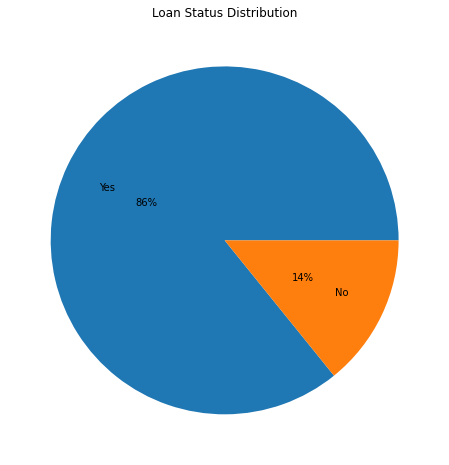

In [60]:
plt.figure(figsize=(8,8))
plt.pie(x=[32717,5406],labels=['Yes','No'], autopct='%1.0f%%', pctdistance=0.5, labeldistance=0.7)
plt.title('Loan Status Distribution')

#Relationship of Loan_status with Home ownership

([], <a list of 0 Text major ticklabel objects>)

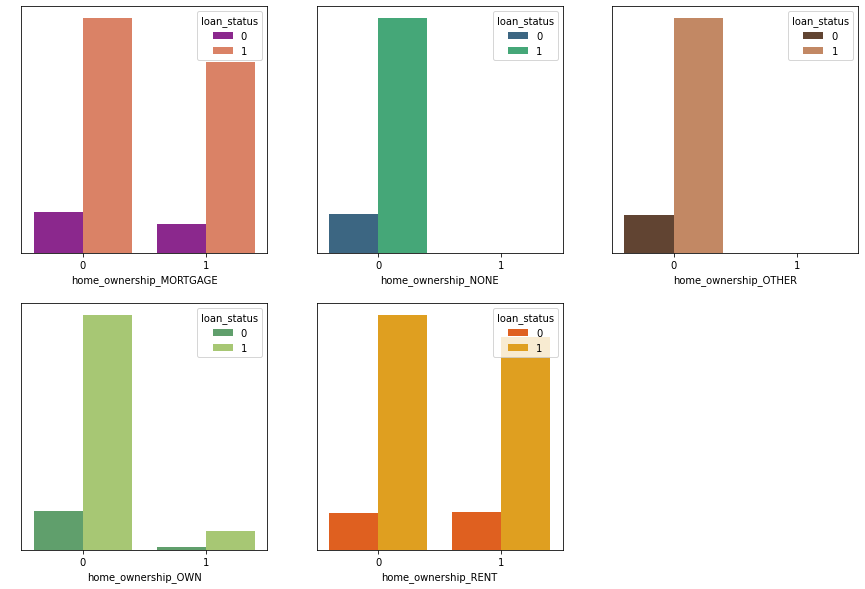

In [61]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(x='home_ownership_MORTGAGE', hue='loan_status', data=Dataset, palette='plasma')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(2,3,2)
sns.countplot(x='home_ownership_NONE', hue='loan_status', data=Dataset, palette='viridis')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(2,3,3)
sns.countplot(x='home_ownership_OTHER', hue='loan_status', data=Dataset, palette='copper')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(2,3,4)
sns.countplot(x='home_ownership_OWN', hue='loan_status', data=Dataset, palette='summer')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(2,3,5)
sns.countplot(x='home_ownership_RENT', hue='loan_status', data=Dataset, palette='autumn')
plt.ylabel(' ')
plt.yticks([])


([], <a list of 0 Text major ticklabel objects>)

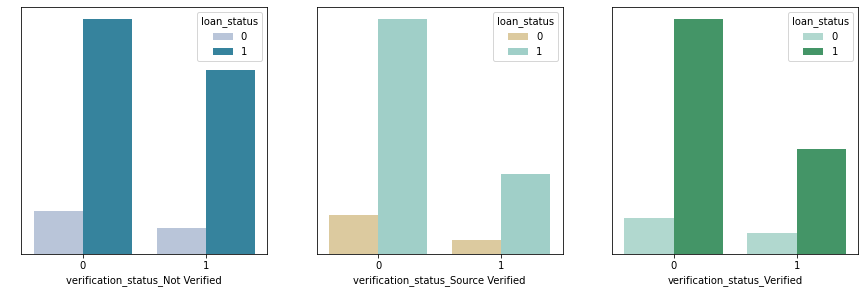

In [62]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(x='verification_status_Not Verified', hue='loan_status', data=Dataset, palette='PuBuGn')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(2,3,2)
sns.countplot(x='verification_status_Source Verified', hue='loan_status', data=Dataset, palette='BrBG')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(2,3,3)
sns.countplot(x='verification_status_Verified', hue='loan_status', data=Dataset, palette='BuGn')
plt.ylabel(' ')
plt.yticks([])

# Relationship between terms and Loan_status

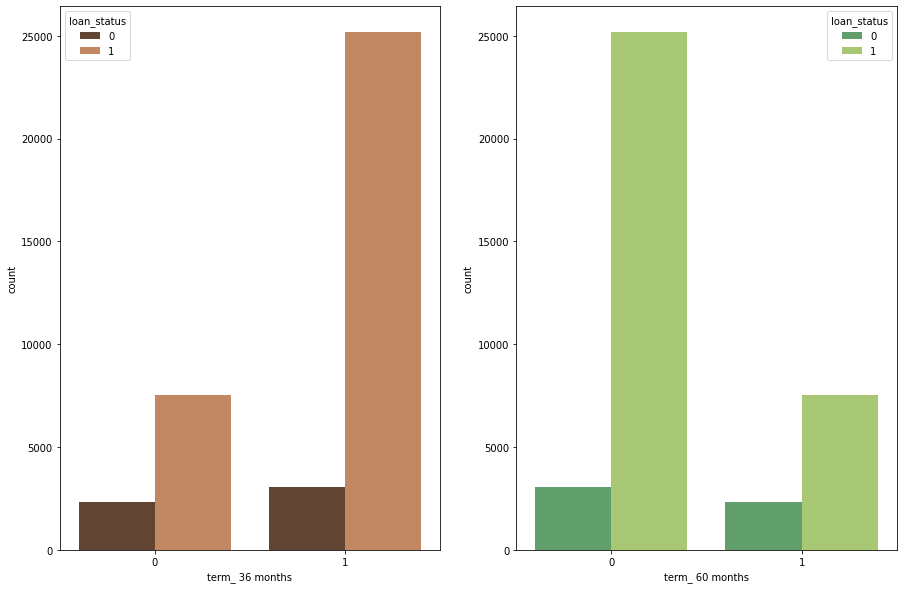

In [63]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.countplot(x='term_ 36 months', hue='loan_status', data=Dataset, palette='copper')

plt.subplot(1,2,2)
sns.countplot(x='term_ 60 months', hue='loan_status',data=Dataset, palette='summer')

# Relationship between Loan Status and Purpose

([], <a list of 0 Text major ticklabel objects>)

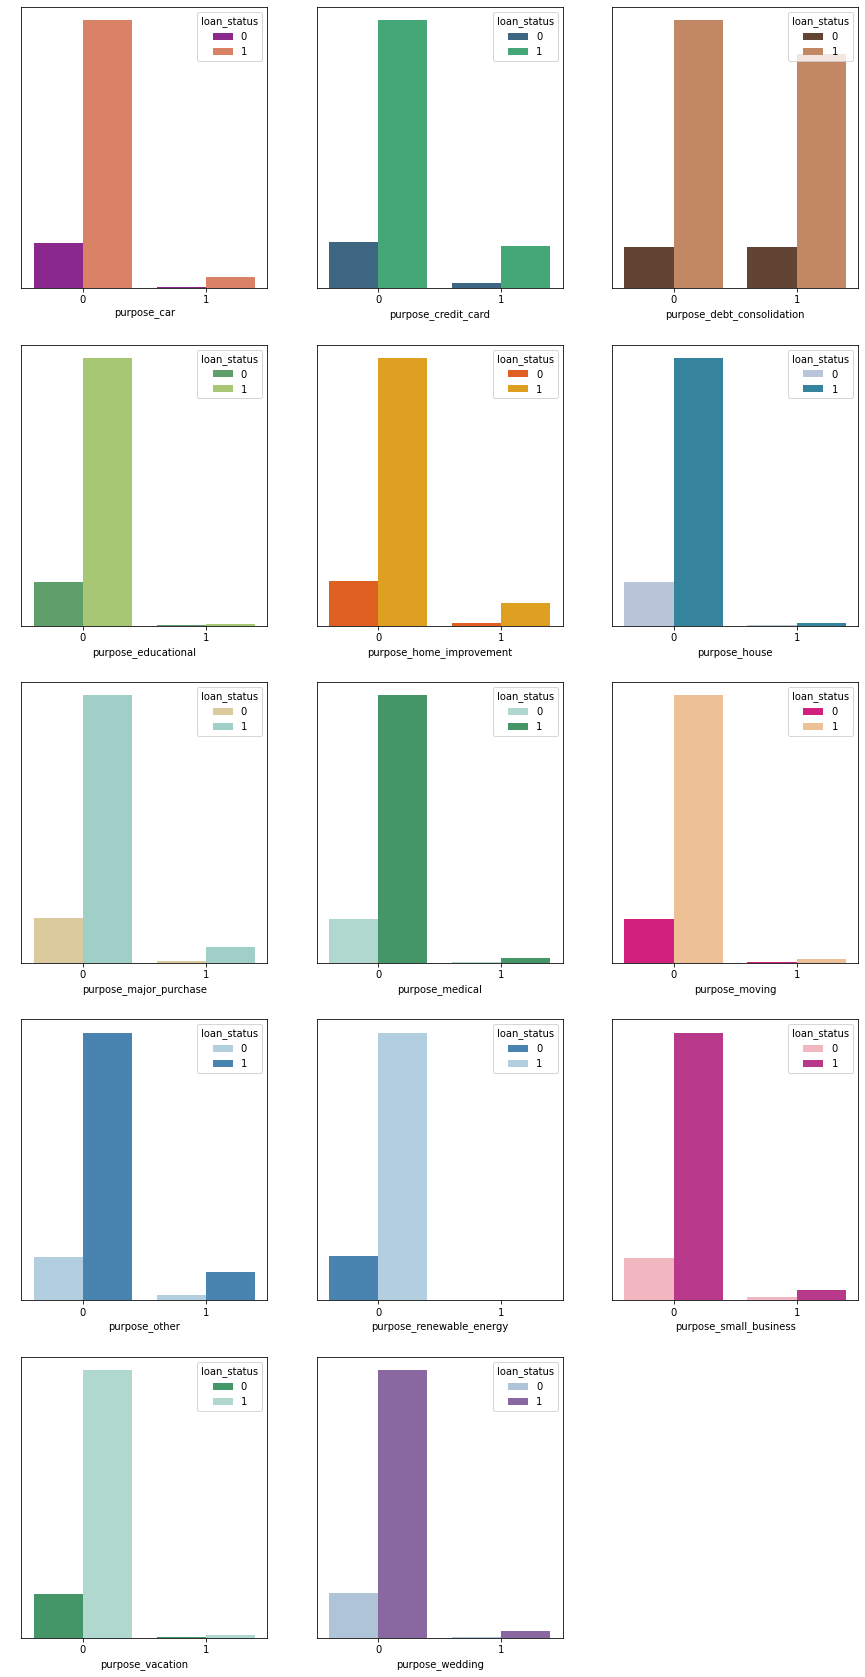

In [64]:
plt.figure(figsize=(15,30))

plt.subplot(5,3,1)
sns.countplot(x='purpose_car', hue='loan_status', data=Dataset, palette='plasma')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(5,3,2)
sns.countplot(x='purpose_credit_card', hue='loan_status', data=Dataset, palette='viridis')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(5,3,3)
sns.countplot(x='purpose_debt_consolidation', hue='loan_status', data=Dataset, palette='copper')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(5,3,4)
sns.countplot(x='purpose_educational', hue='loan_status', data=Dataset, palette='summer')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(5,3,5)
sns.countplot(x='purpose_home_improvement', hue='loan_status', data=Dataset, palette='autumn')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(5,3,6)
sns.countplot(x='purpose_house', hue='loan_status', data=Dataset, palette='PuBuGn')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(5,3,7)
sns.countplot(x='purpose_major_purchase', hue='loan_status', data=Dataset, palette='BrBG')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(5,3,8)
sns.countplot(x='purpose_medical', hue='loan_status', data=Dataset, palette='BuGn')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(5,3,9)
sns.countplot(x='purpose_moving', hue='loan_status', data=Dataset, palette='Accent_r')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(5,3,10)
sns.countplot(x='purpose_other', hue='loan_status', data=Dataset, palette='Blues')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(5,3,11)
sns.countplot(x='purpose_renewable_energy', hue='loan_status', data=Dataset, palette='Blues_r')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(5,3,12)
sns.countplot(x='purpose_small_business', hue='loan_status', data=Dataset, palette= 'RdPu')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(5,3,13)
sns.countplot(x='purpose_vacation', hue='loan_status', data=Dataset, palette='BuGn_r')
plt.ylabel(' ')
plt.yticks([])

plt.subplot(5,3,14)
sns.countplot(x='purpose_wedding', hue='loan_status', data=Dataset, palette='BuPu')
plt.ylabel(' ')
plt.yticks([])

# Frequency of Annual Income, Installment and loan_amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, 'frequency')

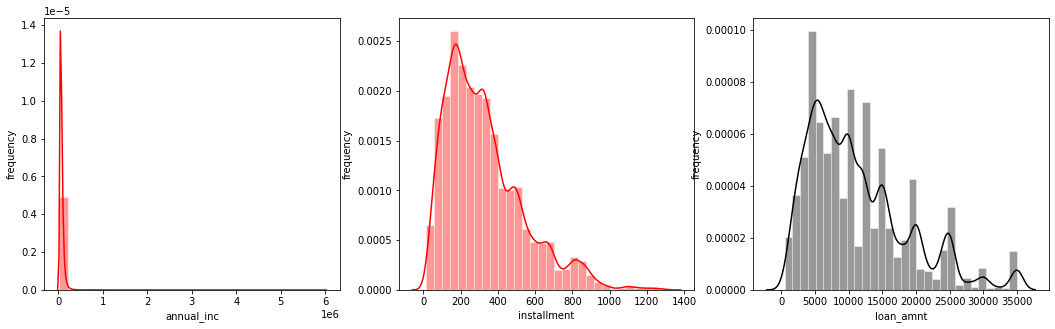

In [65]:
plt.figure(figsize=(18,5))


plt.subplot(1,3,1)
sns.distplot(Dataset['annual_inc'],bins=30,color='r',hist_kws=dict(edgecolor='white'))
plt.ylabel('frequency')

plt.subplot(1,3,2)
sns.distplot(Dataset['installment'],bins=30,color='r',hist_kws=dict(edgecolor='white'))
plt.ylabel('frequency')

plt.subplot(1,3,3)
sns.distplot(Dataset['loan_amnt'],bins=30,color='black',hist_kws=dict(edgecolor='white'))
plt.ylabel('frequency')

In [66]:
px.scatter_3d(data_frame=Dataset,x='annual_inc',y = 'installment',z='loan_amnt',color='loan_status')

Text(0.5, 1.0, 'Loan Status Correlation Matrix')

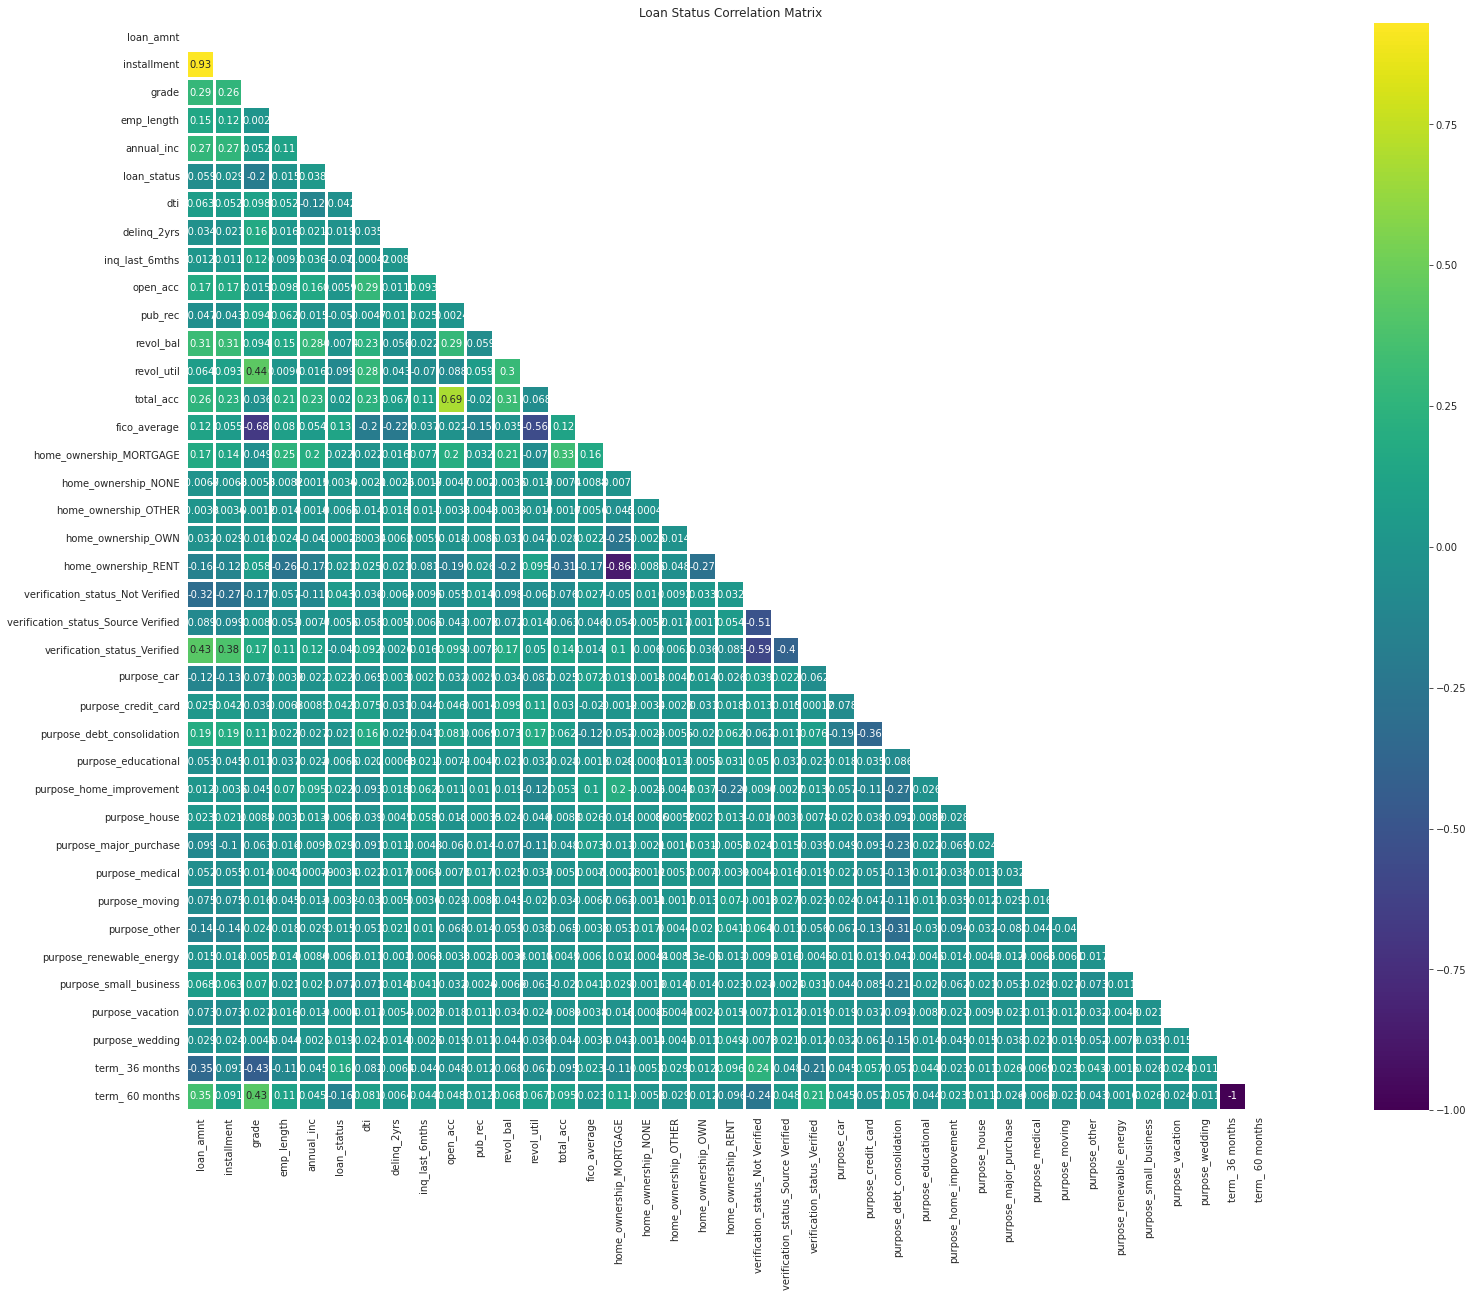

In [67]:
plt.figure(figsize=(36,20))

corr = Dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, linewidths=2, cmap='viridis')
    
plt.title('Loan Status Correlation Matrix')

# Prediction Based on ML Algorithms

# 1. Logistic Regression

In [90]:
X = Dataset.drop(['loan_status'], axis = 1)
y = Dataset['loan_status']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [92]:
lr= LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [93]:
lr_prediction = lr.predict(X_test)

In [94]:
print(confusion_matrix(y_test, lr_prediction))
print('\n')
print(classification_report(y_test, lr_prediction))
print('\n')
print('Logistic Regression accuracy: ', accuracy_score(y_test, lr_prediction))

[[   0 1070]
 [   1 6554]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1070
           1       0.86      1.00      0.92      6555

    accuracy                           0.86      7625
   macro avg       0.43      0.50      0.46      7625
weighted avg       0.74      0.86      0.79      7625



Logistic Regression accuracy:  0.8595409836065574


# 2. Decision Tree

In [95]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [96]:
dt_prediction=dt.predict(X_test)

In [97]:
print(confusion_matrix(y_test,dt_prediction))
print('\n')
print(classification_report(y_test,dt_prediction))
print('\n')
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))

[[ 229  841]
 [ 977 5578]]


              precision    recall  f1-score   support

           0       0.19      0.21      0.20      1070
           1       0.87      0.85      0.86      6555

    accuracy                           0.76      7625
   macro avg       0.53      0.53      0.53      7625
weighted avg       0.77      0.76      0.77      7625



Decision Tree Accuracy:  0.7615737704918033


# 3. Random Forest

In [98]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)  

RandomForestClassifier(n_estimators=200)

In [99]:
rf_prediction=rf.predict(X_test)

In [100]:
print(confusion_matrix(y_test,rf_prediction))
print('\n')
print(classification_report(y_test,rf_prediction))
print('\n')
print('Random Forest Accuracy: ', accuracy_score(y_test,rf_prediction))

[[   4 1066]
 [  12 6543]]


              precision    recall  f1-score   support

           0       0.25      0.00      0.01      1070
           1       0.86      1.00      0.92      6555

    accuracy                           0.86      7625
   macro avg       0.55      0.50      0.47      7625
weighted avg       0.77      0.86      0.80      7625



Random Forest Accuracy:  0.8586229508196721


# 4. KNearest Neighbours

In [101]:
error_rate=[]
for n in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn_prediction=knn.predict(X_test)
    error_rate.append(np.mean(knn_prediction!=y_test))
print(error_rate)

[0.2297704918032787, 0.3118688524590164, 0.1799344262295082, 0.20760655737704917, 0.15868852459016394, 0.17232786885245902, 0.14963934426229508, 0.15632786885245903, 0.14675409836065573, 0.1502950819672131, 0.14373770491803278, 0.1460983606557377, 0.1420327868852459, 0.14268852459016393, 0.14045901639344263, 0.1420327868852459, 0.14059016393442622, 0.14098360655737704, 0.14072131147540984, 0.1417704918032787, 0.14045901639344263, 0.14072131147540984, 0.14059016393442622, 0.14085245901639346, 0.14059016393442622, 0.14059016393442622, 0.14032786885245901, 0.14045901639344263, 0.14032786885245901, 0.14045901639344263, 0.14032786885245901, 0.14059016393442622, 0.14032786885245901, 0.14045901639344263, 0.14032786885245901, 0.14032786885245901, 0.14032786885245901, 0.14032786885245901, 0.14032786885245901]


Text(0.5, 1.0, 'Elbow Method')

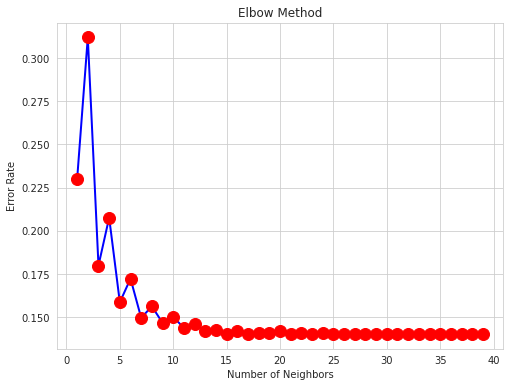

In [102]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,40)),error_rate,color='b', marker='o', linewidth=2, markersize=12, markerfacecolor='r', markeredgecolor='r')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
plt.title('Elbow Method')

In [103]:
knn=KNeighborsClassifier(n_neighbors=23)

In [104]:
knn.fit(X_train, y_train)
knn_prediction=knn.predict(X_test)

In [105]:
print(confusion_matrix(y_test,knn_prediction))
print('\n')
print(classification_report(y_test,knn_prediction))
print('\n')
print('KNN accuracy Accuracy: ', accuracy_score(y_test,knn_prediction))

[[   0 1070]
 [   2 6553]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1070
           1       0.86      1.00      0.92      6555

    accuracy                           0.86      7625
   macro avg       0.43      0.50      0.46      7625
weighted avg       0.74      0.86      0.79      7625



KNN accuracy Accuracy:  0.8594098360655738


# 5. Support Vector Classification

In [106]:
svc=SVC()
svc.fit(X_train, y_train)

SVC()

In [107]:
svc_prediction=svc.predict(X_test)

In [108]:
print(confusion_matrix(y_test,svc_prediction))
print('\n')
print(classification_report(y_test,svc_prediction))
print('\n')
print('SVC َAccuracy: ', accuracy_score(y_test,svc_prediction))

[[   0 1070]
 [   0 6555]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1070
           1       0.86      1.00      0.92      6555

    accuracy                           0.86      7625
   macro avg       0.43      0.50      0.46      7625
weighted avg       0.74      0.86      0.79      7625



SVC َAccuracy:  0.8596721311475409


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [109]:
print('Logistic Regression Accuracy: ', accuracy_score(y_test,lr_prediction))
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))
print('Random Forest Accuracy: ', accuracy_score(y_test,rf_prediction))
print('KNN Accuracy: ', accuracy_score(y_test,knn_prediction))
print('SVC Accuracy: ', accuracy_score(y_test,svc_prediction))

Logistic Regression Accuracy:  0.8595409836065574
Decision Tree Accuracy:  0.7615737704918033
Random Forest Accuracy:  0.8586229508196721
KNN Accuracy:  0.8594098360655738
SVC Accuracy:  0.8596721311475409
